### Simple Regression Model to Predict delivery time using sorting time.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
data=pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Performing EDA on given Data

In [57]:
data.shape

(21, 2)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [59]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [60]:
data[data.duplicated()].shape

(0, 2)

In [61]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [62]:
data=data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [63]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Data Visualization 

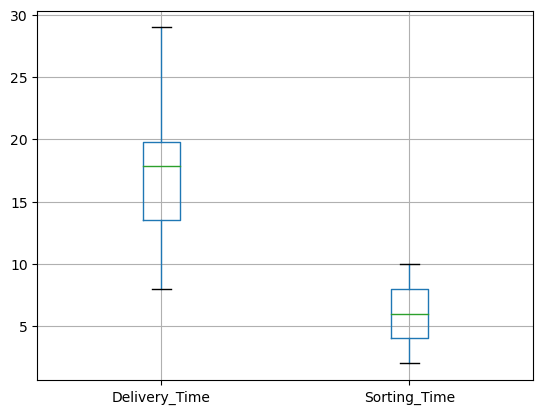

In [64]:
data.boxplot()
plt.show()

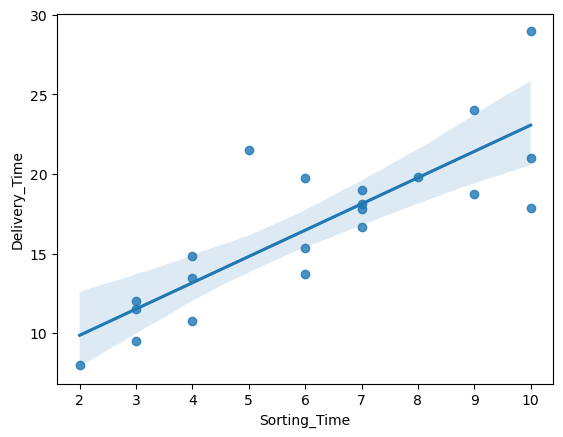

In [65]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data)
plt.show()

### Correlation

In [66]:
cor=data.corr()
cor

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


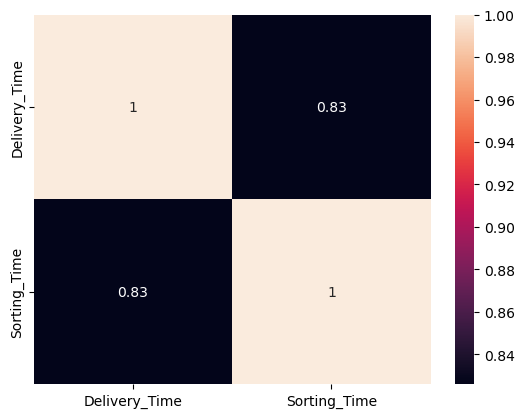

In [67]:
sns.heatmap(cor,annot=True)
plt.show()

### Fitting Our Regression Model

In [68]:
import statsmodels.formula.api as sfa

In [69]:
model=sfa.ols('Delivery_Time~Sorting_Time',data=data).fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        21:17:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The required equation will be: y(Delivery_Time)=6.58+1.65*Sorting_Time

## Predictiction for new delivery time

In [71]:
newdata=pd.Series([5,8,4])
newdata

0    5
1    8
2    4
dtype: int64

In [72]:
pred_time=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [73]:
model.predict(pred_time)

0    14.827833
1    19.774893
2    13.178814
dtype: float64

In [74]:
pred_time['Delivery_Time']=model.predict(pred_time)

In [75]:
round(pred_time,2)

,Sorting_Time,Delivery_Time
0,5,14.83
1,8,19.77
2,4,13.18


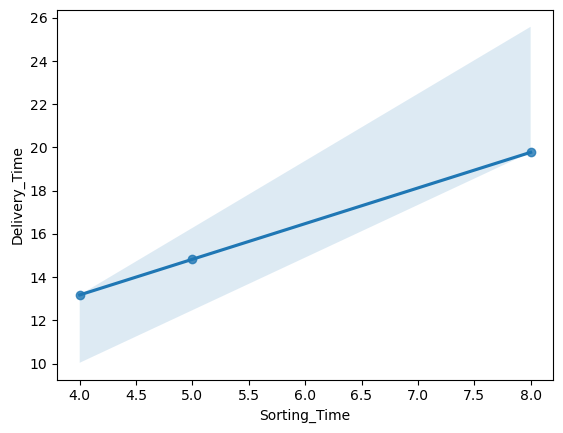

In [76]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=pred_time)
plt.show()

### Building the model by transformation:-

### 1.Normalizaton

In [77]:
df1=data
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
df1_scale=pd.DataFrame(ms.fit_transform(df1))

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


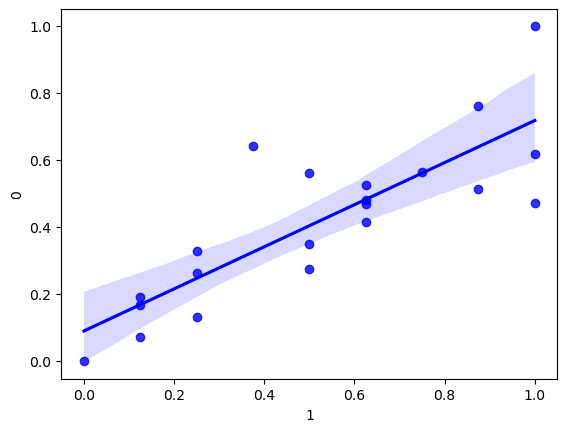

In [78]:
x=df1_scale.iloc[:,-1] 
y=df1_scale.iloc[:,0] 
sns.regplot(x,y,color='b')
plt.show()

In [79]:
model=sfa.ols('y~x',data=df1_scale).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        21:17:26   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0896      0.060      1.496      0.151      -0.036       0.215
x              0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.Standardization

In [81]:
df2=data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df2_scale=pd.DataFrame(ss.fit_transform(df2))

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


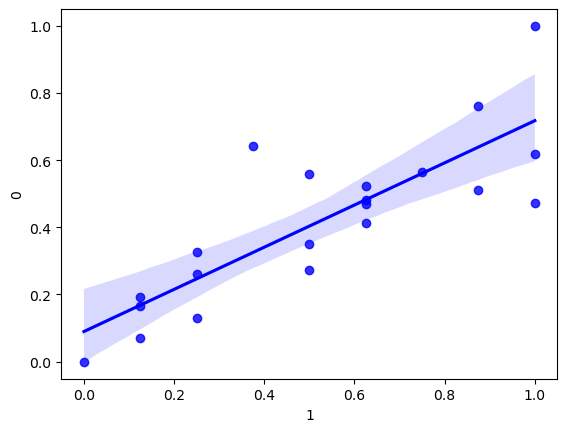

In [82]:
x=df1_scale.iloc[:,-1] 
y=df1_scale.iloc[:,0]
sns.regplot(x,y,color='b')
plt.show()

In [83]:
model=sfa.ols('y~x',data=df1_scale).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        21:17:26   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0896      0.060      1.496      0.151      -0.036       0.215
x              0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.Log Transformation

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


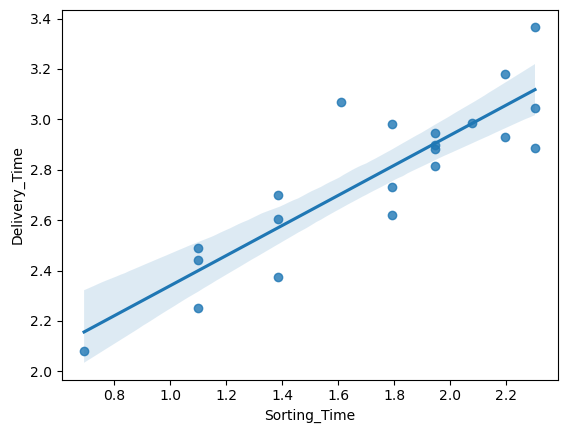

In [85]:
df2_scale = np.log(df2)
x=df2_scale.iloc[:,-1] 
y=df2_scale.iloc[:,0] 
sns.regplot(x,y)
plt.show()

In [86]:
model=sfa.ols("y~x",data=df2_scale).fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.60e-07
Time:                        21:17:27   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
x              0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.Squreroot Transformation

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


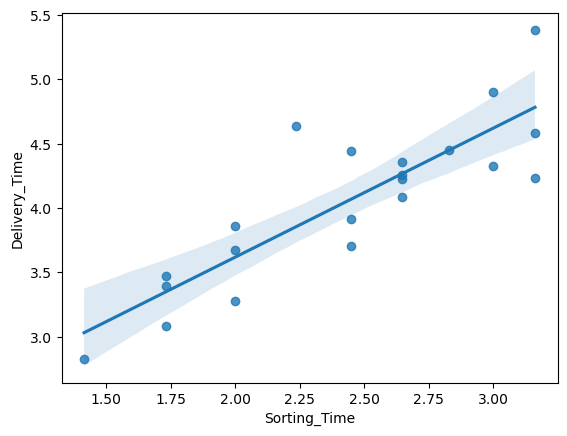

In [88]:
df2_scale = np.sqrt(df2)
x=df2_scale.iloc[:,-1] 
y=df2_scale.iloc[:,0] 
sns.regplot(x,y)
plt.show()

In [89]:
model=sfa.ols("y~x",data=df2_scale).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           8.48e-07
Time:                        21:17:28   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
x              1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:- From Above analysis it is clear that Log transformation give best R2 Score.